In [1]:
#ucitavanje paketa
import pandas as pd
import numpy as np
from scipy.sparse import *
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
%matplotlib inline
import warnings
from sklearn.feature_extraction.text import CountVectorizer
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords

In [2]:
#citanje
data1 = pd.read_csv("spam.csv",encoding='latin-1')


#spajanje zadnja cetri stupca kako bi ostavili poruke u potpunosti spojenima
data1 = data1.rename(columns={"Unnamed: 2":"two", "Unnamed: 3":"tri","Unnamed: 4":"cetr"})
a =  data1[data1["two"].notnull()]["v2"].map(str) + data1[data1["two"].notnull()]["two"].map(str)
data1.loc[data1["two"].notnull(),"v2"] = a
a =  data1[data1["tri"].notnull()]["v2"].map(str) + data1[data1["tri"].notnull()]["tri"].map(str)
data1.loc[data1["tri"].notnull(),"v2"] = a
a =  data1[data1["cetr"].notnull()]["v2"].map(str) + data1[data1["cetr"].notnull()]["cetr"].map(str)
data1.loc[data1["cetr"].notnull(),"v2"] = a
data1 = data1[["v1","v2"]]
#data1.to_csv("proba.csv")



data1 = data1.rename(columns={"v1":"category_class", "v2":"sms"})
codes = {'ham':0, 'spam':1}
data1["class"] = data1["category_class"].map(codes)
#data1.tail()

#a.to_csv("proba.csv")

In [3]:
#nltk.download('punkt')
#nltk.download('stopwords')
def tokenize_data(data):
    tokens = data.apply(lambda row: nltk.word_tokenize(row['sms']), axis=1)
    return tokens

def tokenize_and_visualite(data, common_count = 50, hist_title = 'Most Common Tokens'):
    tokens = tokenize_data(data)
    
    all_tokens = []
    for token_list in tokens:
        for token in token_list:
            all_tokens.append(token)
            
    fd = nltk.FreqDist(all_tokens)

    norm = fd.N()
    kommon =[]
    
    for key, val in fd.most_common(common_count):
        kommon.append((key, val/norm))
    
    df = pd.DataFrame(kommon)
    df.columns = ["token", "frequency"]

    df.plot(
        kind='barh',
        x='token',
        title=hist_title,
        figsize = (12,8)
    )
    #plt.show()

    return

We can notice that most common tokens are stop words and punctuations.
To be certain that we should remove them we need to check what is their origin: spam or ham.


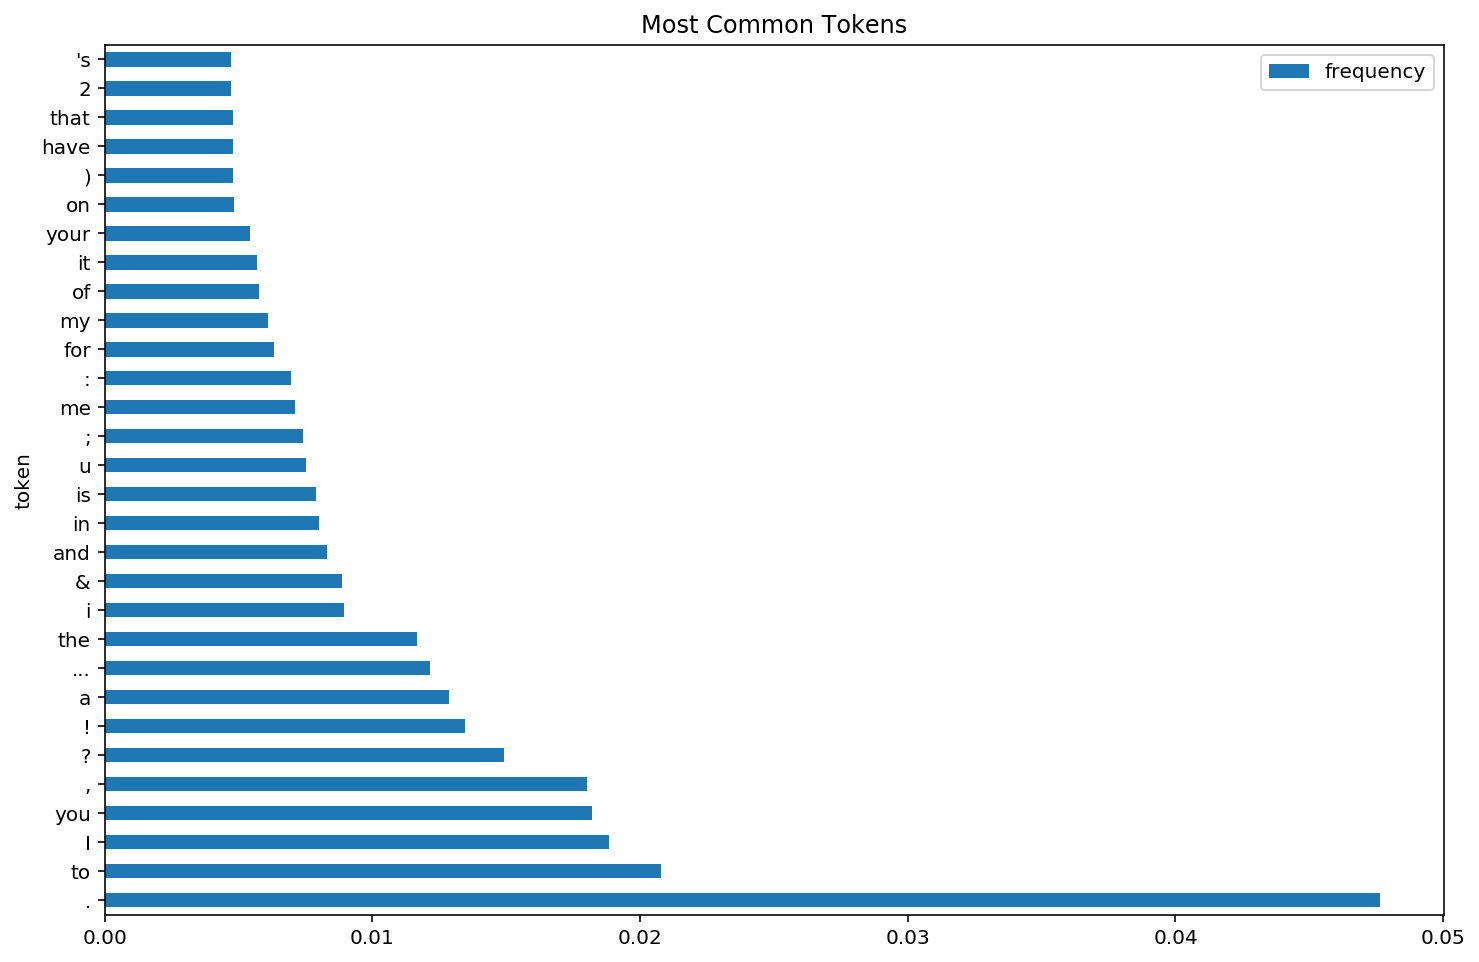

In [4]:
tokenize_and_visualite(data1, 30)
print("We can notice that most common tokens are stop words and punctuations.")
print("To be certain that we should remove them we need to check what is their origin: spam or ham.")

For ham messages we get same result most common tokens are stop words and punctuations.


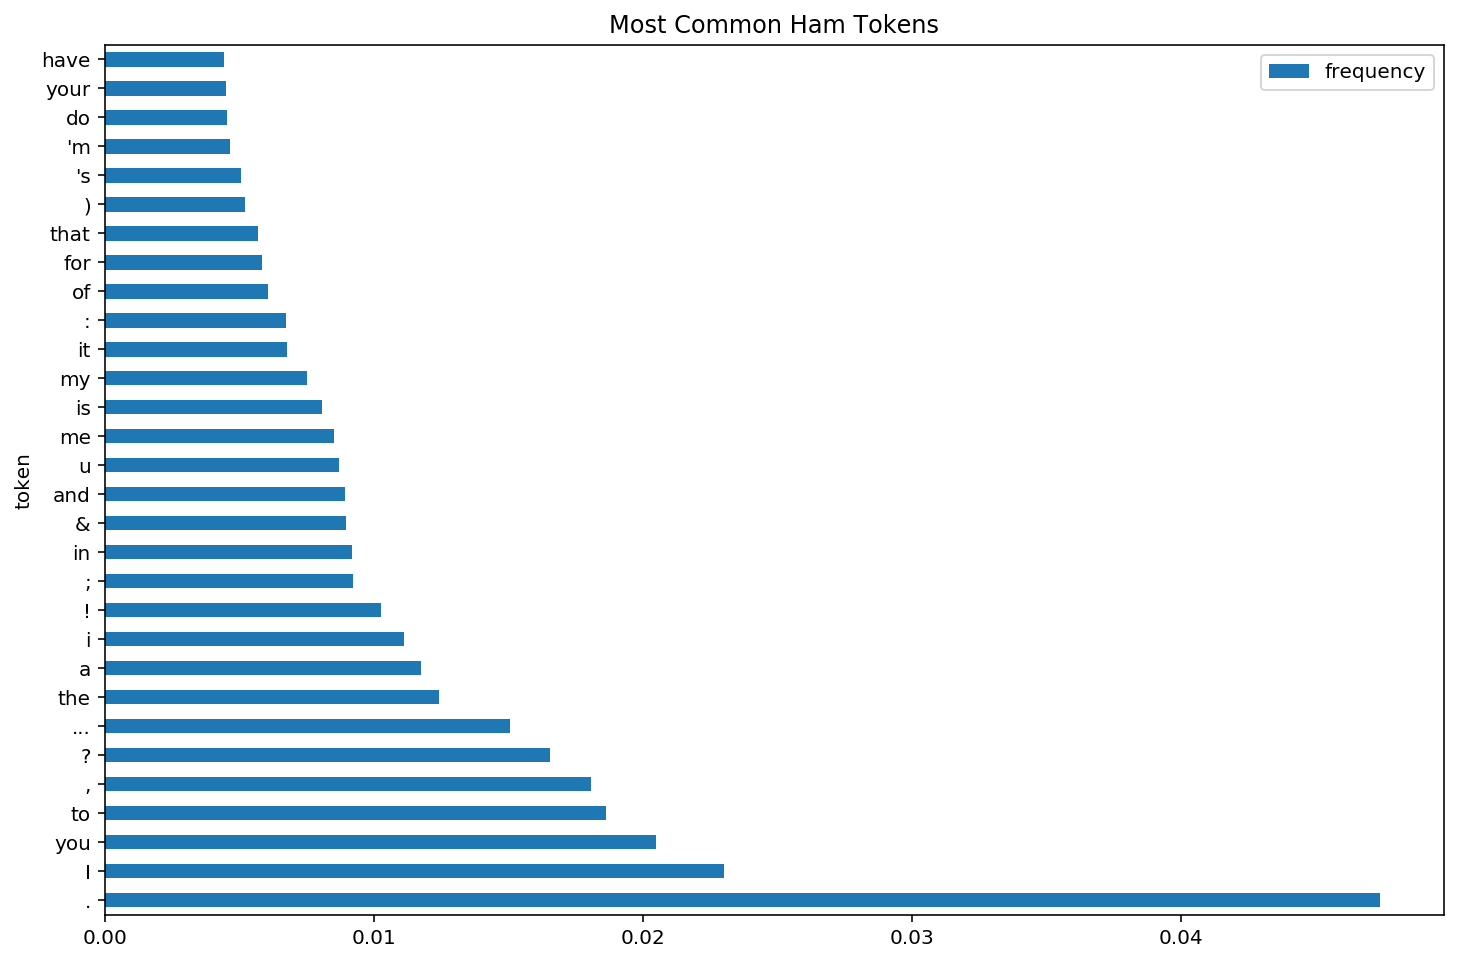

Similar result for spam messages. 
Worth noticing is that we have Call and call as most common words
which suggest that we should lowercase every sentence before any further preprocessing.


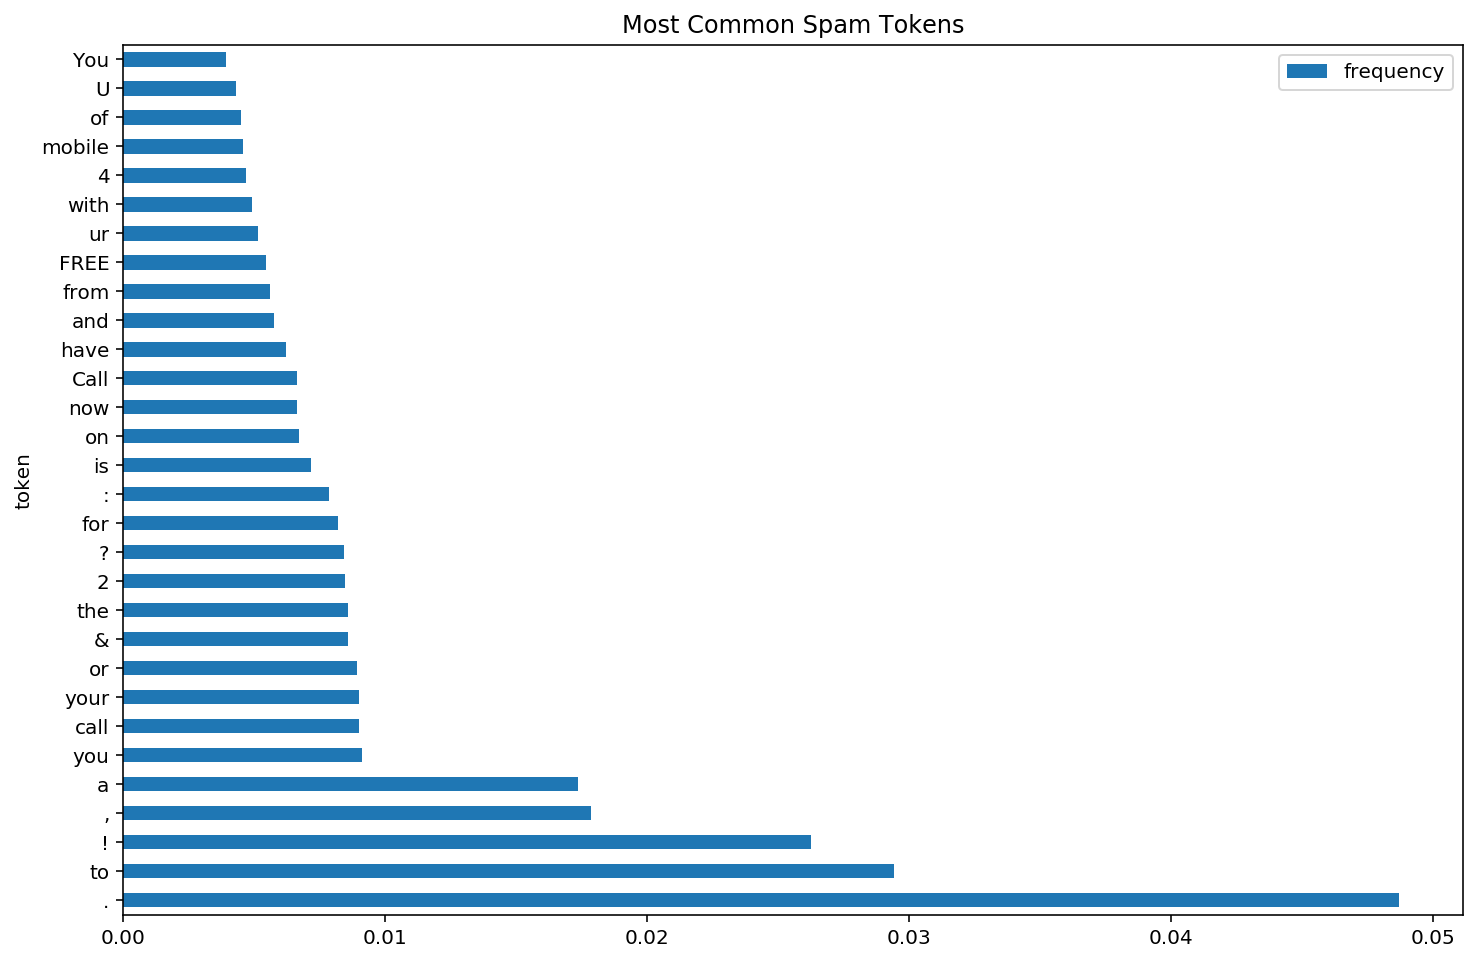

In [5]:
ham_sms = data1[data1['category_class'] == 'ham']
tokenize_and_visualite(ham_sms, 30, "Most Common Ham Tokens")
print("For ham messages we get same result most common tokens are stop words and punctuations.")
plt.show()
spam_sms = data1[data1['category_class'] == 'spam']
tokenize_and_visualite(spam_sms, 30, "Most Common Spam Tokens")
print("Similar result for spam messages. \nWorth noticing is that we have Call and call as most common words\nwhich suggest that we should lowercase every sentence before any further preprocessing.")

In [6]:
import string
def text_process(text):
    table = str.maketrans('', '', string.punctuation)
    english_stops = set(stopwords.words('english'))
    text = [word.lower().translate(table) for word in text.split() if word.lower() not in english_stops]
    return " ".join(text)

text_feat = data1['sms'].copy()
text_feat = text_feat.apply(text_process)

text_feat_spam = data1[data1['category_class'] == 'spam']['sms'].copy()
text_feat_spam = text_feat_spam.apply(text_process)

text_feat_ham = data1[data1['category_class'] == 'ham']['sms'].copy()
text_feat_ham = text_feat_ham.apply(text_process)

In [7]:
#tokenizer = nltk.tokenize.RegexpTokenizer("[\w']+")
#tokens = text_feat_spam.apply(lambda row: tokenizer.tokenize(row))

def plot_words_distribution(data, title):
    tokens = data.apply(lambda row: nltk.word_tokenize(row))

    all_tokens = []
    for token_list in tokens:
        for token in token_list:
            all_tokens.append(token)

    fd = nltk.FreqDist(all_tokens)

    norm = fd.N()
    kommon =[]
    for key, val in fd.most_common(30):
        kommon.append((key, val/norm))

    df = pd.DataFrame(kommon)
    df.columns = ["token", "prob"]

    df.plot(
        kind='barh',
        x='token',
        title=title,
        figsize = (12,8)
    )
    plt.show()
    return

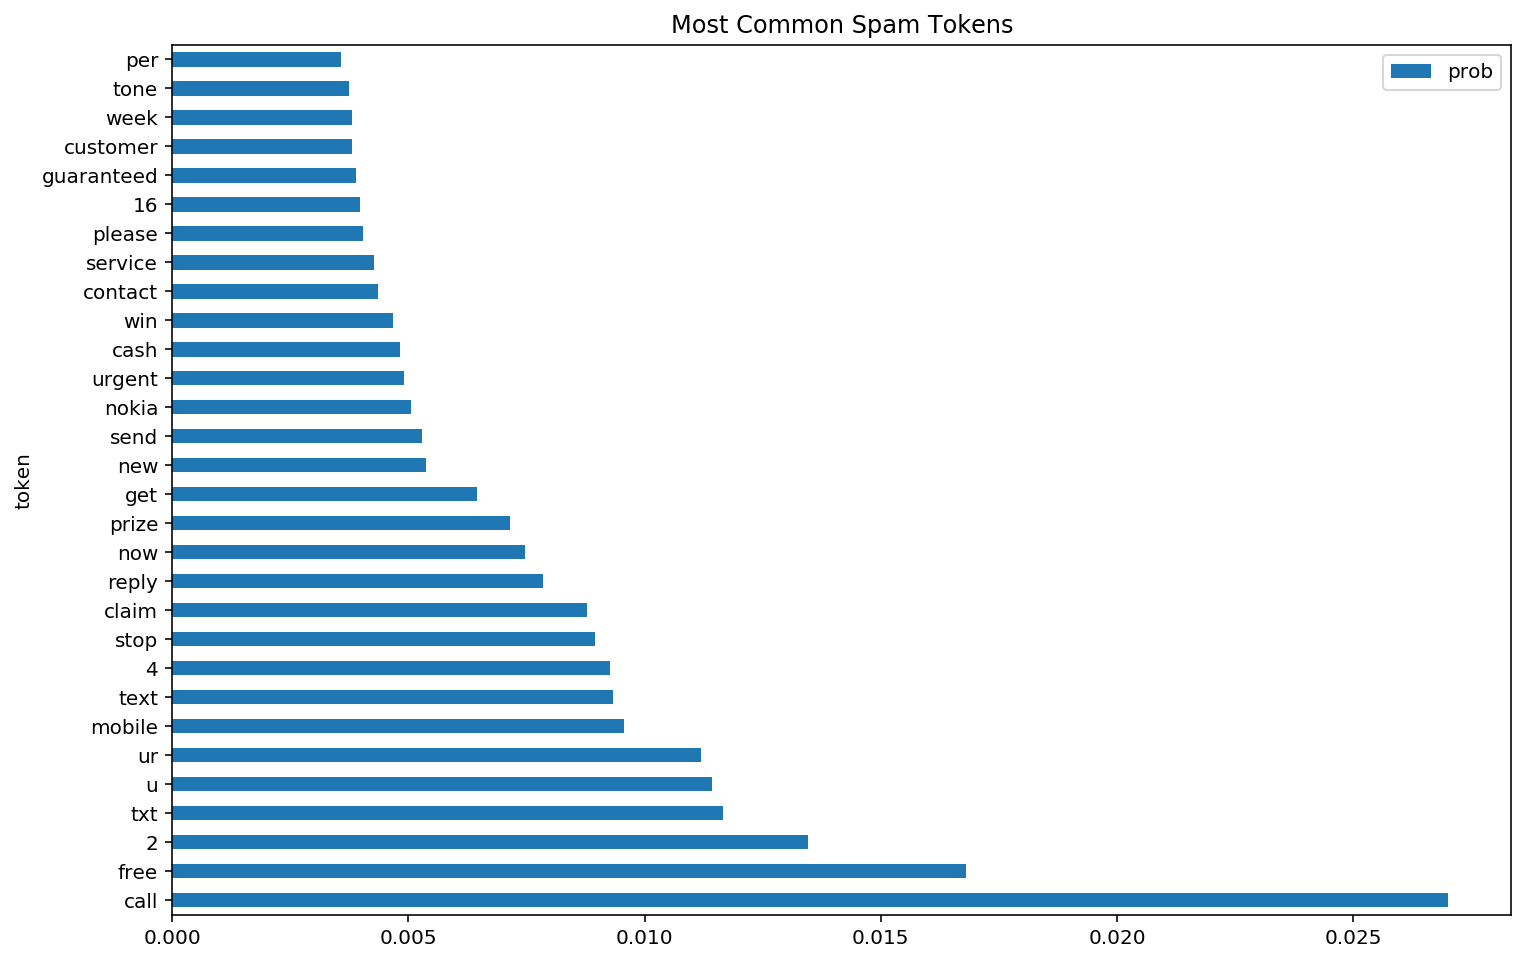

After lowercase and non-word tokens removal we get more interpretable result, one we would expect from spam SMS.


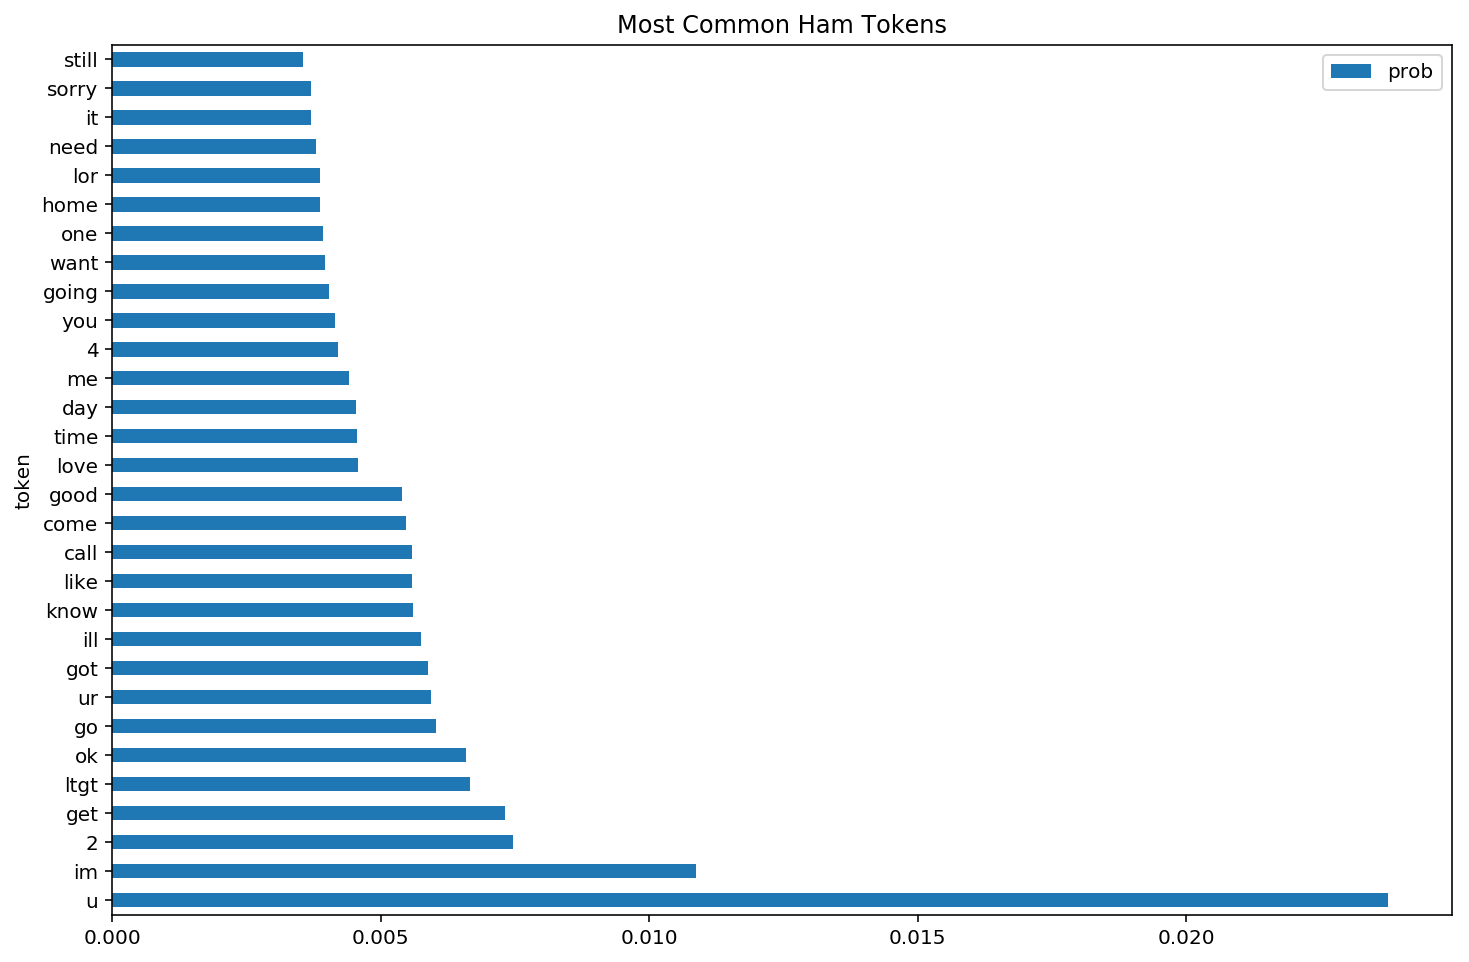

In [8]:
plot_words_distribution(text_feat_spam, 'Most Common Spam Tokens')
print("After lowercase and non-word tokens removal we get more interpretable result, one we would expect from spam SMS.")

plot_words_distribution(text_feat_ham, 'Most Common Ham Tokens')